# Importing Libraries

In [40]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [41]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [42]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

# Dataset Creation and Preprocessing

In [43]:
X,y=make_blobs(n_features=50,centers=20,n_samples=20000,
              cluster_std=0.2,center_box=[-1,1],random_state=17)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=17)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Principal Component Analysis PCA Model

In [45]:
pca=PCA(n_components=2)
pca.fit(X_test)

res_pca=pca.transform(X_test)

Text(0.5, 1.0, 'PCA Results')

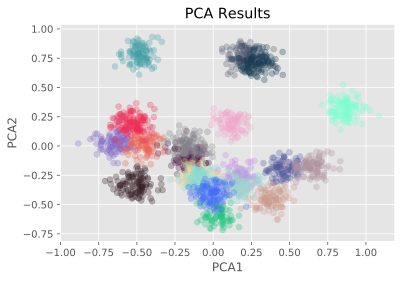

In [46]:
unique_labels=np.unique(y_test)

for index,uniqu_labels in enumerate (unique_labels):
    X_data=res_pca[y_test==uniqu_labels]
    
    plt.scatter(X_data[:,0],X_data[:,1],alpha=0.3,c=cols[index])
    
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Results')

#  Autoencoder Theory and Training


In [47]:
autoendcoder=MLPRegressor(alpha=1e-15,
                          hidden_layer_sizes=(50,100,50,2,50,100,50),
                         random_state=1,max_iter=20000)
autoendcoder.fit(X_train,X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=20000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Reducing Dimensionality with Encoder

In [55]:
W= autoendcoder.coefs_
biases= autoendcoder.intercepts_

In [56]:
for w in W :
    print(w.shape)


(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [57]:
encoder_weights = W[0:4]
encoder_biases=biases[0:4]

In [58]:
def encode (encoder_wights,encoder_biases,data):
    res_ae = data
    for index ,(w,b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae= res_ae@w+b
        else:
            res_ae= np.maximum(0, res_ae@w+b)
            
    return res_ae

res_ae=encode(encoder_weights,encoder_biases,X_test)

In [59]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoendecoder Results')

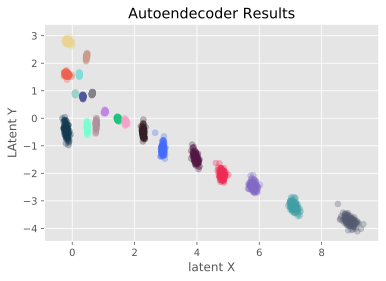

In [60]:
unique_labels=np.unique(y_test)

for index,uniqu_labels in enumerate (unique_labels):
    latent_space=res_ae[y_test==uniqu_labels]
    
    plt.scatter(latent_space[:,0],latent_space[:,1],alpha=0.3,c=cols[index])
    
plt.xlabel('latent X')
plt.ylabel('LAtent Y')
plt.title('Autoendecoder Results')

### silhoutte score measures how will suited each of these points to the clusters in the dataset 
#### the best value is 1 ,the worest value is -1 ,0 value indecates overlapping clusters negative values generally indecate that a sample has been assigned to the worng cluster .

In [65]:
#intial dataset with 50 dimensions
silhouette_score(X_test,y_test)

0.6100948647899368

In [62]:
silhouette_score(res_pca,y_test)

0.3400579741119032

In [64]:
silhouette_score(res_ae,y_test)


0.8074659601928073

the autoencoder had actually a better representation of the clusters than the original data itself